In [6]:
#### OSCILADOR ARMÓNICO SIMPLE ASIMÉTRICO ####

import numpy as np
import matplotlib.pyplot as plt
import scipy as scipy
from math import *

# Condiciones iniciales

x_0 = 1 # Posición inicial (arb)
v_0 = 0 # Velocidad inicial (arb)

# Definiciones iniciales

k = 20 # Número de veces que cambia la k en el movimiento del oscilador
sep = 100 # Número de puntos registrados en cada oscilación
t = k*sep # Instantes totales de tiempo en los que se registran el movimiento del oscilador
w_0 = 1 # Frecuencia x>0
W_0 = 50 # Frecuencia x<0
amort = 0 # constante de amortiguamiento
f_0 = 0 # Amplitud de la fuerza por unidad de masa
w = 0 # Frecuencia fuerza externa

# Predefinimos las matrices donde guardaremos los resultados

T = np.zeros(k+1) # instantes donde x se hace cero
v_c = np.zeros(k+1) # velocidades donde x se hace cero
x_c = np.zeros(k+1) # posiciones donde x se hace cero

In [7]:
def W(x): # frecuecia angular
    return W_0 - (W_0-w_0)*np.heaviside(x,w_0)

In [8]:
def X(t,T,x0,v0,s):
    A = f_0/np.sqrt(((W(s)**2-w**2)**2+(2*amort*w)**2))
    if W(s) != w:
        d = np.arctan(2*amort*w/(W(s)**2-w**2))
    else:
        d = pi/2
    r = np.sqrt(W(s)**2-amort**2)
    c2 = np.exp(amort*T)*(((v0+A*w*np.sin(w*T-d))+(x0-A*np.cos(w*T-d))*(amort+r*np.tan(r*T)))/(r/np.cos(T*r)))
    c1 = -c2*np.tan(r*T)+np.exp(amort*T)*((x0-A*np.cos(w*T-d))/np.cos(T*r))

    return np.exp(-amort*t)*(c1*np.cos(t*r)+c2*np.sin(t*r))+A*np.cos(w*t-d)

def V(t,T,x0,v0,s):
    A = f_0/np.sqrt(((W(s)**2-w**2)**2+(2*amort*w)**2))
    if W(s) != w:
        d = np.arctan(2*amort*w/(W(s)**2-w**2))
    else:
        d = pi/2
    r = np.sqrt(W(s)**2-amort**2)
    c2 = np.exp(amort*T)*(((v0+A*w*np.sin(w*T-d))+(x0-A*np.cos(w*T-d))*(amort+r*np.tan(r*T)))/(r/np.cos(T*r)))
    c1 = -c2*np.tan(r*T)+np.exp(amort*T)*((x0-A*np.cos(w*T-d))/np.cos(T*r))

    return np.exp(-amort*t)*(np.cos(t*r)*(-amort*c1+r*c2)+np.sin(t*r)*(-r*c1-amort*c2))-w*A*np.sin(w*t-d)

In [9]:
times = [] # Creamos una lista para almacenar los instantes de tiempo donde se calculan las posiciones y velocidades sin predefinir la dimensión
pos = []
vel = []
T[0] = scipy.optimize.fsolve(X,1/sep,args = (0,x_0,v_0,1))
per = np.linspace(0,T[0],sep) # Puntos de la primera oscilación
times.append(per) # Se añaden los instantes al array del tiempo total
x = X(per,0,x_0,v_0,(-1)**0)
v = V(per,0,x_0,v_0,(-1)**0)
x_c[0] = x[np.size(per)-1]
v_c[0] = v[np.size(per)-1]
pos.append(x)
vel.append(v)

for i in range(k): # Se repiten los mismos pasos anteriores para cada oscilación alternando las frecuencias angulares cada vez que se pase por x=0
    s = (-1)**(i+1)
    pru = [scipy.optimize.fsolve(X,T[i]+pi/W(s)-pi/(j*W(s)),args = (T[i],x_c[i],v_c[i],s),xtol = 1e-16) for j in range(1,sep)]
    while np.min(pru) <= T[i] or abs(X(np.min(pru),T[i],x_c[i],v_c[i],s)) > 1e-2:
        pru.remove(np.min(pru))
        
    T[i+1] = np.min(pru) # Se calcula el tiempo que tardará en volver a x=0
    print(T[i+1])
    per = np.linspace(T[i],T[i+1],sep) # Se crean los siguientes instantes de tiempo y se almacenan
    times.append(per)
    x = X(per,T[i],x_c[i],v_c[i],s)
    v = V(per,T[i],x_c[i],v_c[i],s)
    x_c[i+1] = x[np.size(per)-1]
    v_c[i+1] = v[np.size(per)-1]
    pos.append(x)
    vel.append(v)

tiempos = np.reshape(np.array(times),(int(np.size(times)))) # Convertimos la lista de tiempos en un array de una única fila
posic = np.reshape(np.array(pos),(int(np.size(pos))))
veloc = np.reshape(np.array(vel),(int(np.size(vel)))) 

1.6336281798666925
4.775220833456486
4.838052686528282
7.979645340118075
8.042477193189871
11.184069846779664
11.246901699851458
11.24690169985146
11.309733552923255
14.451326206513048
14.514158059584844
14.514158059584847
14.576989912656641
14.576989912656643
14.639821765728438
17.78141441931823
17.844246272390027
20.98583892597982
21.048670779051612
21.048670779051616


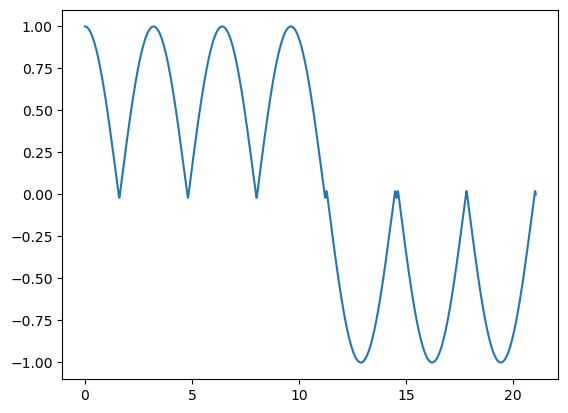

[ 6.12323400e-17  7.37264002e-18 -3.33066907e-16  1.17454793e-16
  0.00000000e+00  9.21256263e-16 -8.04911693e-16 -1.68443718e-15
  8.32667268e-17  1.32345387e-16 -2.77555756e-16  2.76690462e-15
 -8.32667268e-16 -1.65668160e-15  1.66533454e-16  4.90786606e-17
 -1.66533454e-16  3.82145568e-16 -4.99600361e-16  2.98894923e-15
 -5.55111512e-16]


In [10]:
plt.plot(tiempos,posic)
plt.show()
print(x_c)